<a href="https://colab.research.google.com/github/Dr-Schmoctor/sales-predictions/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales
- Author: Jeffrey Prichard


##Data Dictionary

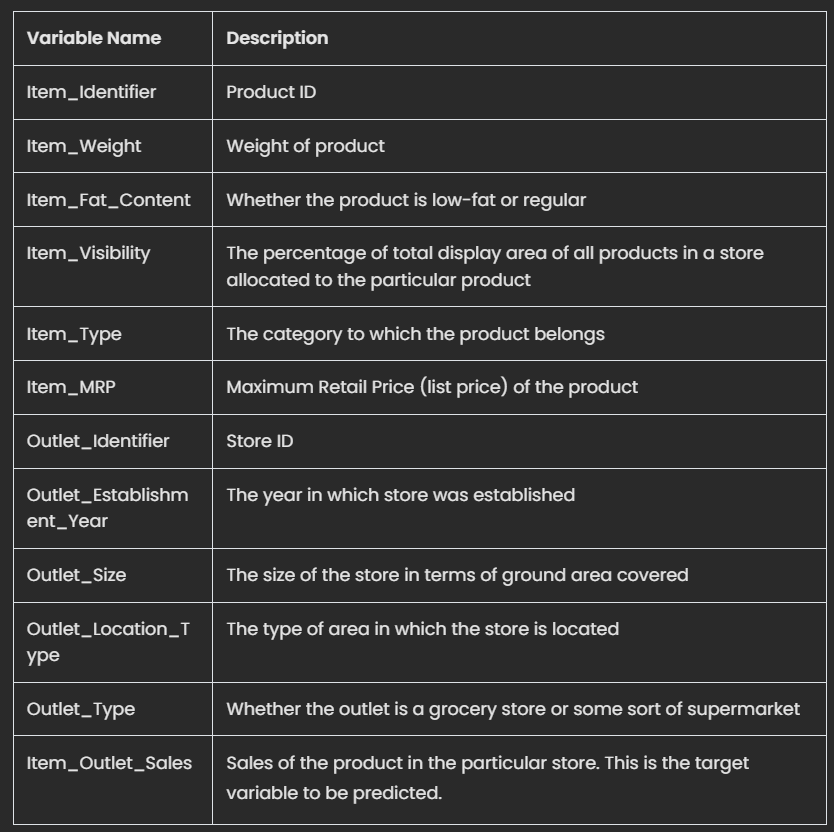

#Load and Inspect Data:


In [1]:
#imports
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
pd.set_option("display.max_columns",100)

##Loading Data

In [2]:
#File location
file = "/content/drive/MyDrive/DataAnalytics/Project/sales_predictions_2023.csv"

#reading csv for dataframe and preview
df = pd.read_csv(file)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###Inspecting Data

In [3]:
#INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#Number of Rows, Columns
df.shape

(8523, 12)

1) How many rows and columns?

* 8523 Rows, 12 Columns

2) What are the datatypes of each variable?


In [5]:
#DataType for Columns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


All of the DataTypes are acceptable for the desired columns.

In [7]:
#Checking for unique values in each column
df.nunique()/len(df)*100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

#Clean Data

##Cleaning Data

###Duplicates

In [8]:
#duplicate filter
dup_rows = df.duplicated()
dup_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [9]:
#Duplicate Count
df.duplicated().sum()

0

3) Are there duplicates? If so, drop any duplicates.

There are 0 Duplicated Rows and we do not need to remove any from our dataframe.

###Missing Values

4) Identify missing values.

In [10]:
#Convert the data to a Boolean detecting Nan
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#Total number of nul values for each column
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can establish that two columns need to be updated for null values:
* Item_Weight
* Outlet_Size

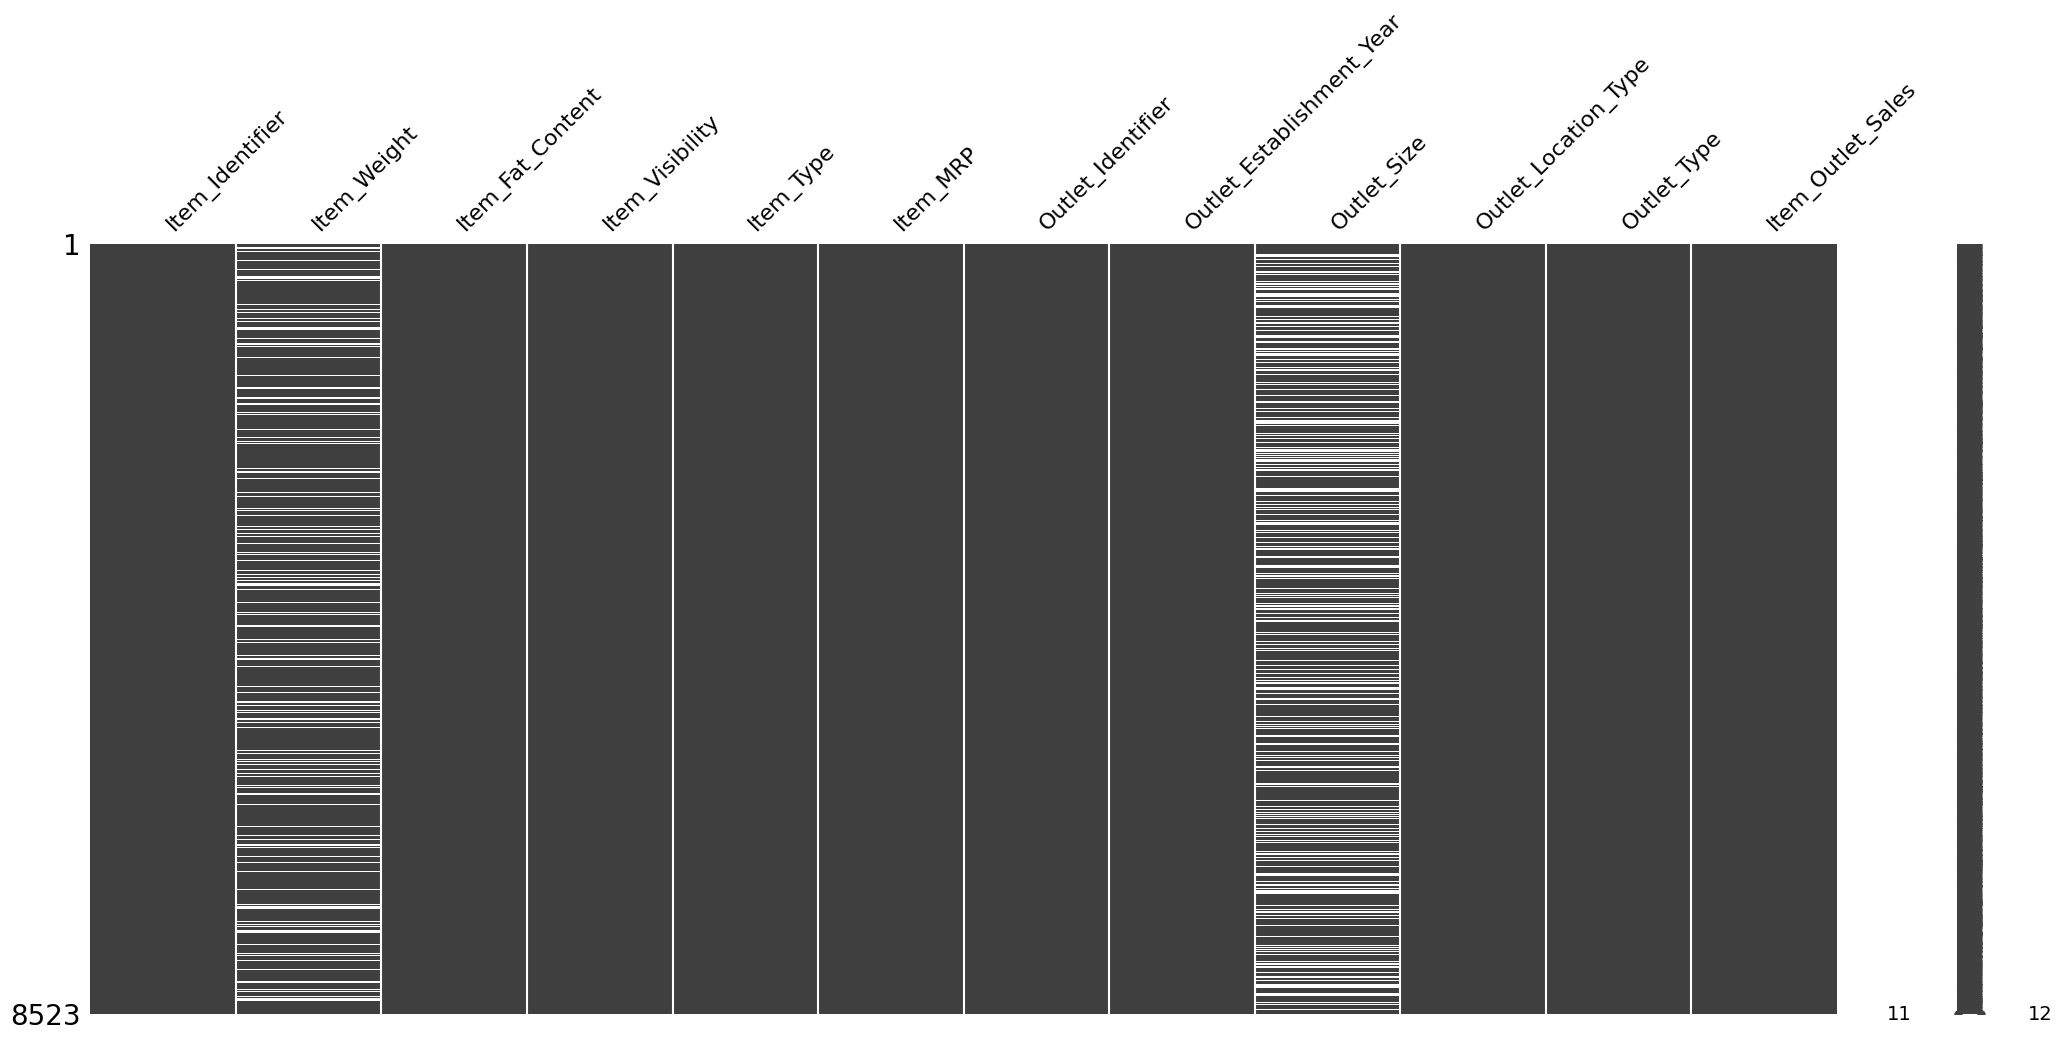

In [12]:
#We can visualize this information with misingno which we imported at the start
msno.matrix(df);

5) Address the missing values by using a placeholder value.

We need to update the null values in each; however, the item_weight is a numerical value and the outlet_size is an object.

In [13]:
#First, lets address the outlet_size

df["Outlet_Size"].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
#This confirms that we need to update 2410 values in this column.

#Lets replace all null with MISSING
df["Outlet_Size"] = df["Outlet_Size"].fillna("MISSING")

df["Outlet_Size"].value_counts(dropna=False)

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [15]:
#Confirm null count for outlet_size
df.isna().sum()

#Next, lets address the Item_Weight

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
#lets inspect the values
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

Nothing out of order with our values. Next we can update all of our nulls to show -1 to represent our missing data.

In [17]:
#Replace null values with -1
df['Item_Weight'] = df['Item_Weight'].fillna(-1)

#Confirm the change
df['Item_Weight'].isna().sum()

0

In [18]:
#Final missing value check to confirm all are updated.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

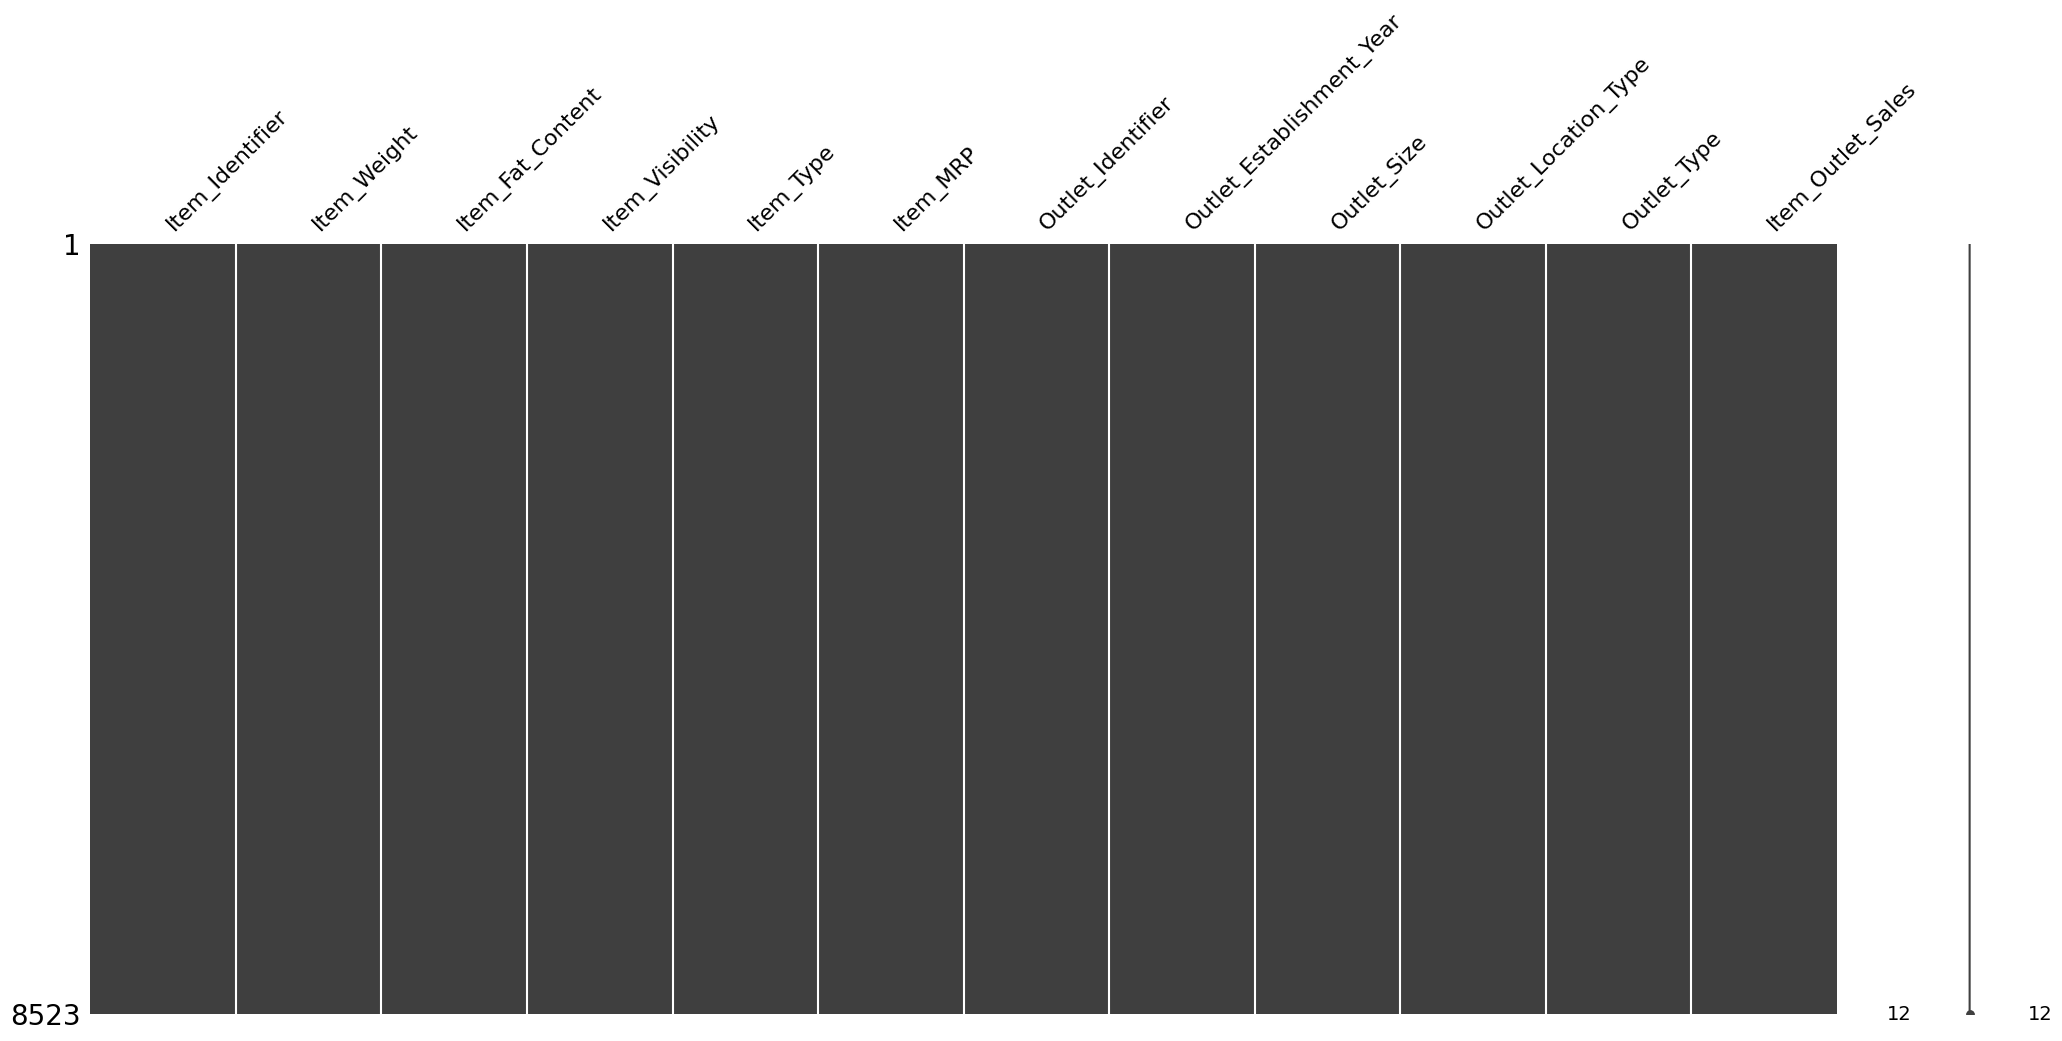

In [19]:
#Returned missingno for visual representation
msno.matrix(df);

6) Confirm that there are no missing values after addressing them.

There are 0 missing data values

###Inconsistent Data

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [20]:
#Lets break our columns into variables by data type
cat_cols = df.select_dtypes('object').columns

num_cols =df.select_dtypes('number').columns

In [21]:
#Now lets view our value_counts for all object columns
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


Here we can identify that nearly all of our object types are correct without any errors. However, we can update both the errors of spelling in the Item_Fat_Content and the Outlet_Size of High to Large to fit with the small, medium and large theme.

In [22]:
#Item_Fat_Content
#Lets standardize our values
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
#Outlet_Size
df["Outlet_Size"] = df["Outlet_Size"].replace({"High":"Large"})
df["Outlet_Size"].value_counts()

Medium     2793
MISSING    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

###Numerical Analysis

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [24]:
#Numerical Average/Mean:
df[num_cols].mean()

Item_Weight                    10.478936
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [25]:
#Numerical Minimum:
df[num_cols].min()

Item_Weight                    -1.00
Item_Visibility                 0.00
Item_MRP                       31.29
Outlet_Establishment_Year    1985.00
Item_Outlet_Sales              33.29
dtype: float64

In [26]:
#Numerical Maximium:
df[num_cols].max()

Item_Weight                     21.350000
Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
dtype: float64

In [27]:
#Numerical Median:
df[num_cols].median()

Item_Weight                    11.000000
Item_Visibility                 0.053931
Item_MRP                      143.012800
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
dtype: float64

#Exploratory Data Analysis:


For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

*  Histograms to view the distributions of numerical features in your dataset.
* Boxplots to view statistical summaries of numerical features in your dataset.
* Countplots to view the frequency of each class of categorial features in your dataset.
* Heatmap to view the correlation between features.

##Numerical Feature Analysis

In [47]:
cat_cols = df.select_dtypes('object').columns

num_cols = df.select_dtypes('number').columns

num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

For each numerical feature, we shall plot a distribution and box plot to better visualize

* Item_Weight
* Item_Visibility
* Item_MRP
* Outlet_Establishment_Year
* Item_Outlet_Sales



###Item Weight Analysis

Item weight will not change by any other feature, thus we can look at this column alone for analysis.

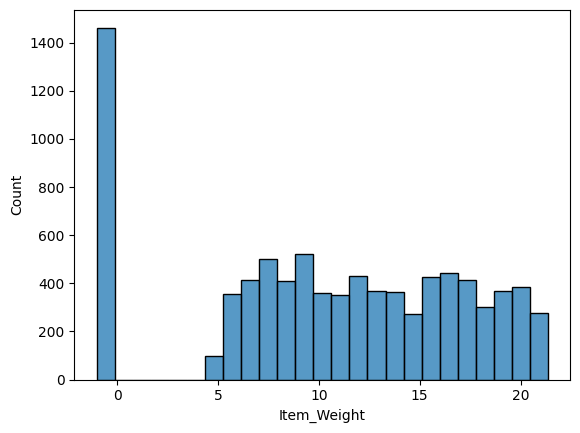

In [29]:
#item Weight - Histogram
ax = sns.histplot(data=df, x = "Item_Weight")

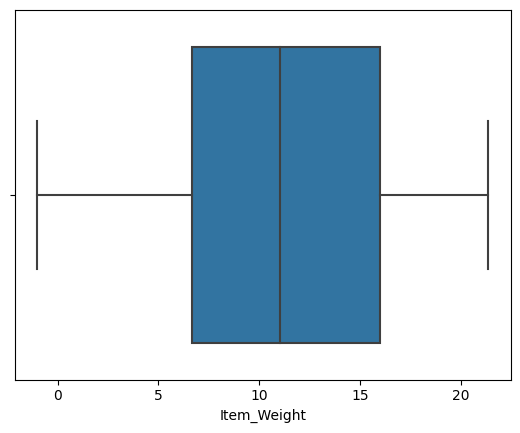

In [30]:
#Item_Weight BoxPlot
ax = sns.boxplot(data=df, x= "Item_Weight")

From our Histogram we can identify our Missing Values that we filled with -1. These have created the tallest bar and can be disregarded or Removed from analysis.

###Item Visibility

For Item visibility, we want to split up our data by the categorical feature Outlet Size, as this could have an affect on the visibility of items.

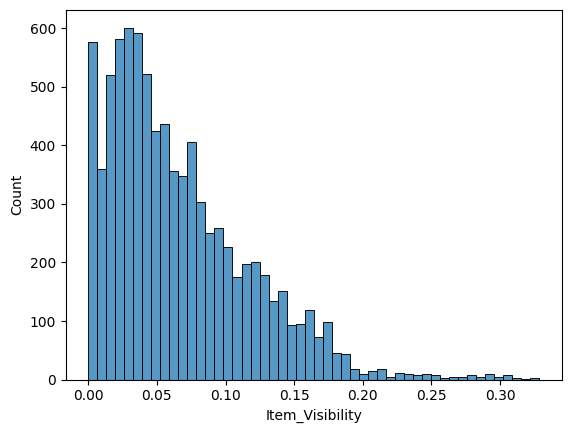

In [31]:
#item Visibility - Histogram
ax = sns.histplot(data=df, x = "Item_Visibility")

Using our histogram we can see the distribution is mainely weighted toward the lower weight values; with several outliers ranging into the 30 value for weight.

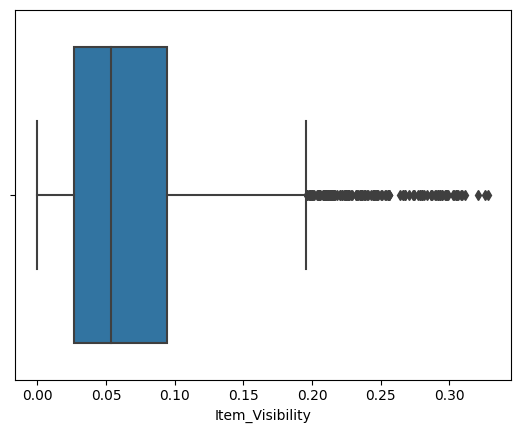

In [32]:
#Item Visibility Boxplot
ax = sns.boxplot(data=df, x= "Item_Visibility")

This Confirms our above analysis that the data is grouped mostly around the 0.05 value with a large number of outliers existing between 0.2 and 0.35

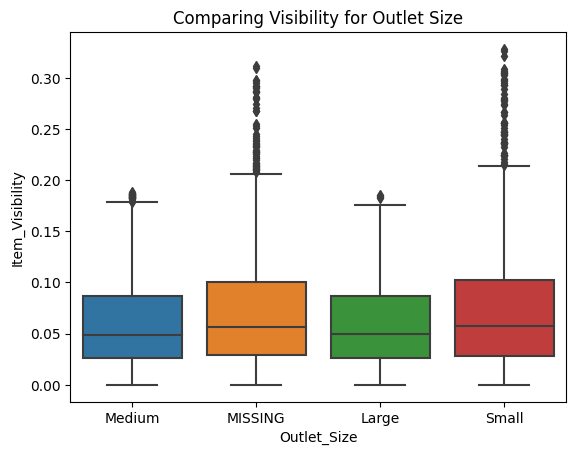

In [33]:
#Item Visibility by Outlet Size
ax = sns.boxplot(data=df, x='Outlet_Size', y="Item_Visibility" )
ax.set_title("Comparing Visibility for Outlet Size");

When we break it down by Outlet size we can see that our Missing Values are appearing here. However, from our box plots we can see that the median values are similar and the quartile ranges are similar for all of the outlet sizes. The one thing we can take away is that our Small and Missing data set contain Most of the outlier values.

###Item_MRP

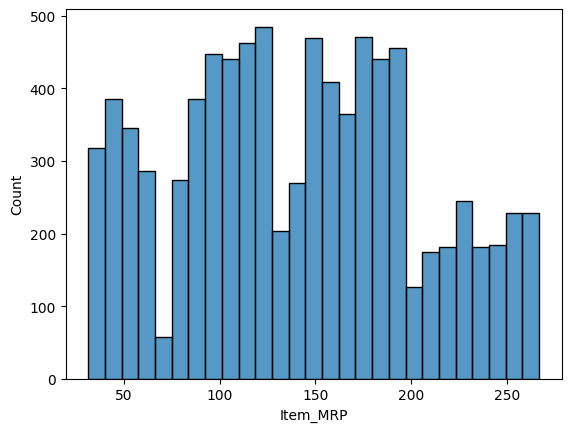

In [34]:
#histogram - item_MRP
ax = sns.histplot(data=df, x = "Item_MRP")

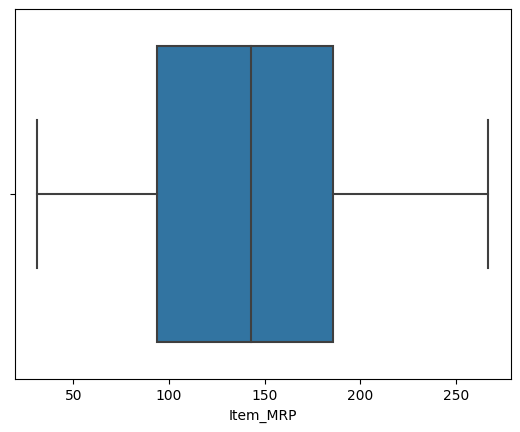

In [35]:
#Item MRP Boxplot
ax = sns.boxplot(data=df, x= "Item_MRP")

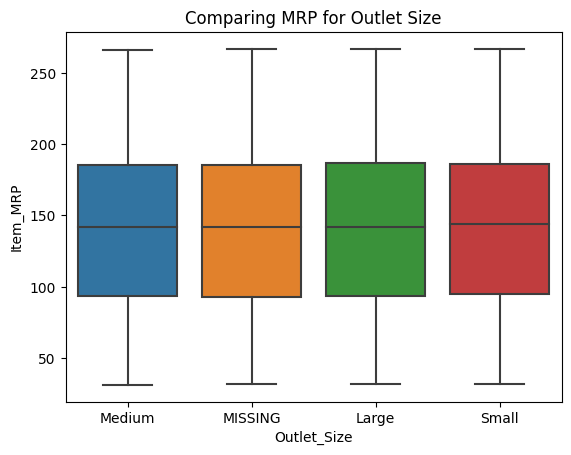

In [71]:
#Item MRP by outlet size
ax = sns.boxplot(data=df, x='Outlet_Size', y="Item_MRP" )
ax.set_title("Comparing MRP for Outlet Size");

From our Analysis we can see that our Item MRP is consistent across all Outlet Sizes and the data has no significant outliers to address.

###Outlet_Establishment_Year

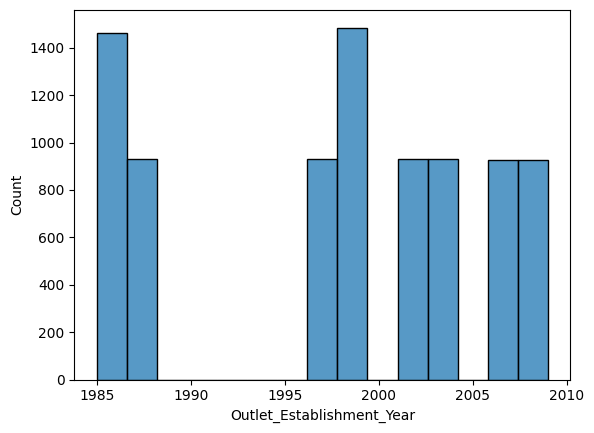

In [37]:
#histogram - OUtlet Establishment
ax = sns.histplot(data=df, x = "Outlet_Establishment_Year")

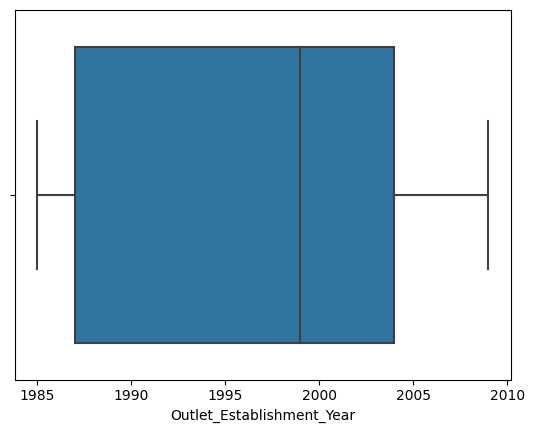

In [38]:
#OUtlet Establishment Boxplot
ax = sns.boxplot(data=df, x= "Outlet_Establishment_Year")

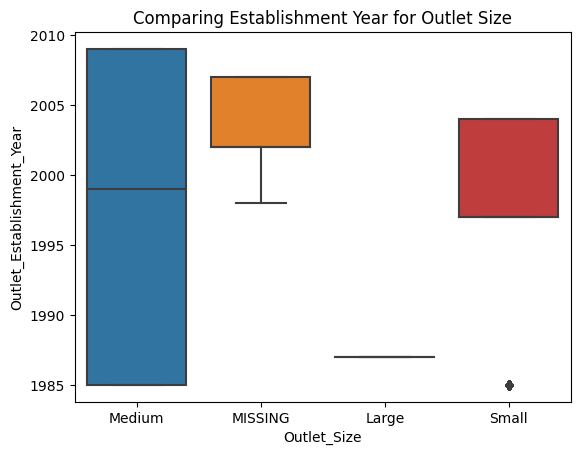

In [39]:
#Comparing Establishment year by outlet size
ax = sns.boxplot(data=df, x='Outlet_Size', y="Outlet_Establishment_Year" )
ax.set_title("Comparing Establishment Year for Outlet Size");

From our analysis, we can determine that there were no significant outliers that need to be addressed from our data set.

We can also see that:
*  there was a significant gap in development of new outlets from the years 1988 to 1995.
* No Large Outlets have been developed since before 1990.
* Nearly all of our recent development of Outlets is focused on Medium size
* Small outlets are primarly opened during the period of 1999 to 2005; however there was 1 developed in 1985

###Item_Outlet_Sales

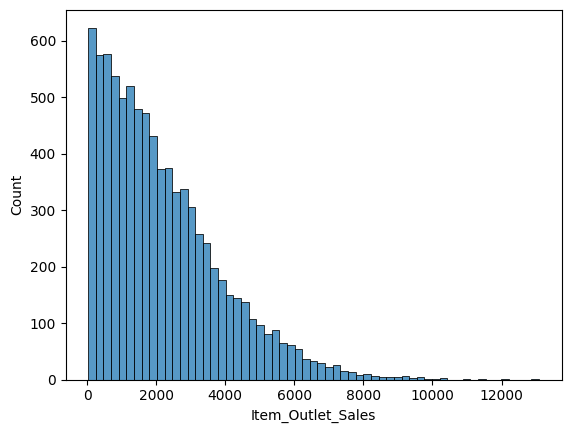

In [40]:
ax = sns.histplot(data=df, x = "Item_Outlet_Sales")

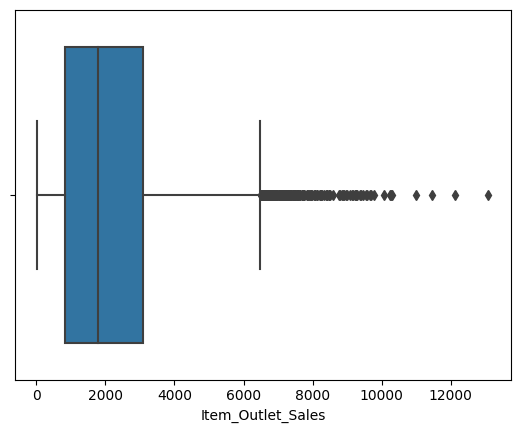

In [41]:
ax = sns.boxplot(data=df, x= "Item_Outlet_Sales")

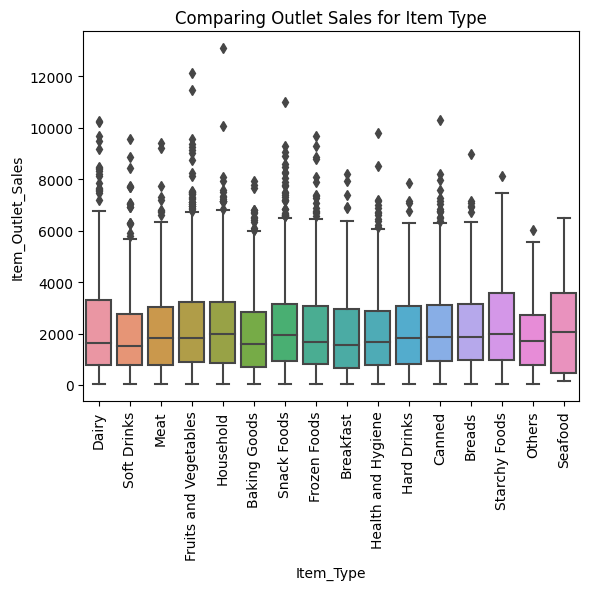

In [69]:
ax = sns.boxplot(data=df, x='Item_Type', y="Item_Outlet_Sales" )
ax.tick_params(axis='x', rotation=90)
ax.set_title("Comparing Outlet Sales for Item Type");

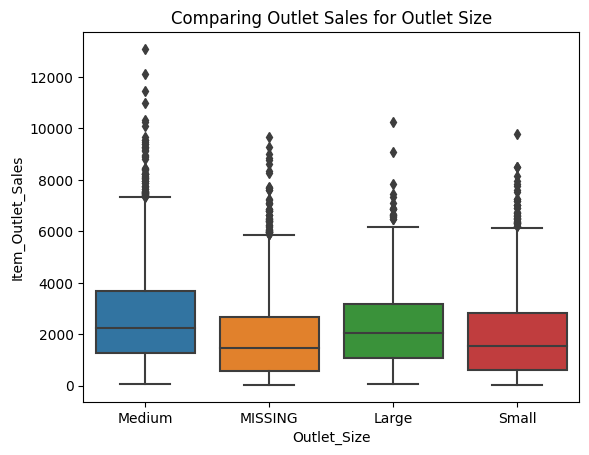

In [42]:
ax = sns.boxplot(data=df, x='Outlet_Size', y="Item_Outlet_Sales" )
ax.set_title("Comparing Outlet Sales for Outlet Size");

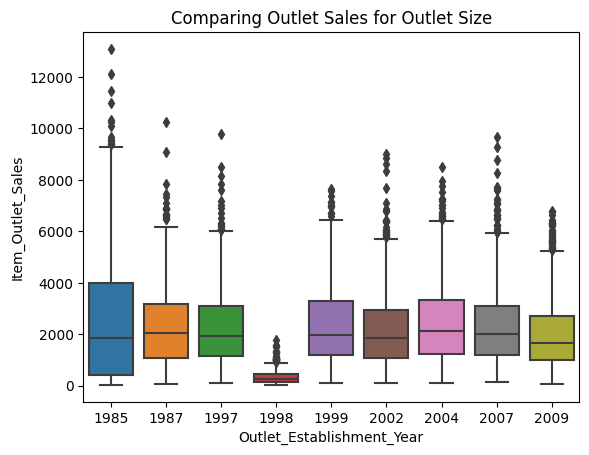

In [43]:
ax = sns.boxplot(data=df, x='Outlet_Establishment_Year', y="Item_Outlet_Sales" )
ax.set_title("Comparing Outlet Sales for Outlet Size");

For this analysis or Sales, we wanted to get a bit more detail as this can be a very important Feature for our client.

From our analysis we can determine,
* Outlet Size does not significantly impact outlet sales. Our analysis shows that there are several outliers, but the median and quartile ranges are  similar for all sizes.
* Establishment Year also does not significantly impact outlet sales. LWe can see that there was 1 year in particular that had a much lower impact on sales (1998), however, because our data for the years outside of 1998 are extremely similary, we can assume that this is due to an outside source and can investigate further.

##Categorical Feature Analysis:


In [44]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

For Our Categorical features, we can analyze:
* Item_Fat_Content
* Item_Type
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

We can leave the Item_Identifier and the Outlet_Identfier out of our analysis as these are nearly unique values for each item and outlet to be identified.

####Function

Source:


```
Function Code found on Exemplar Project Example
```



In [50]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

###Item_Fat_Content

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


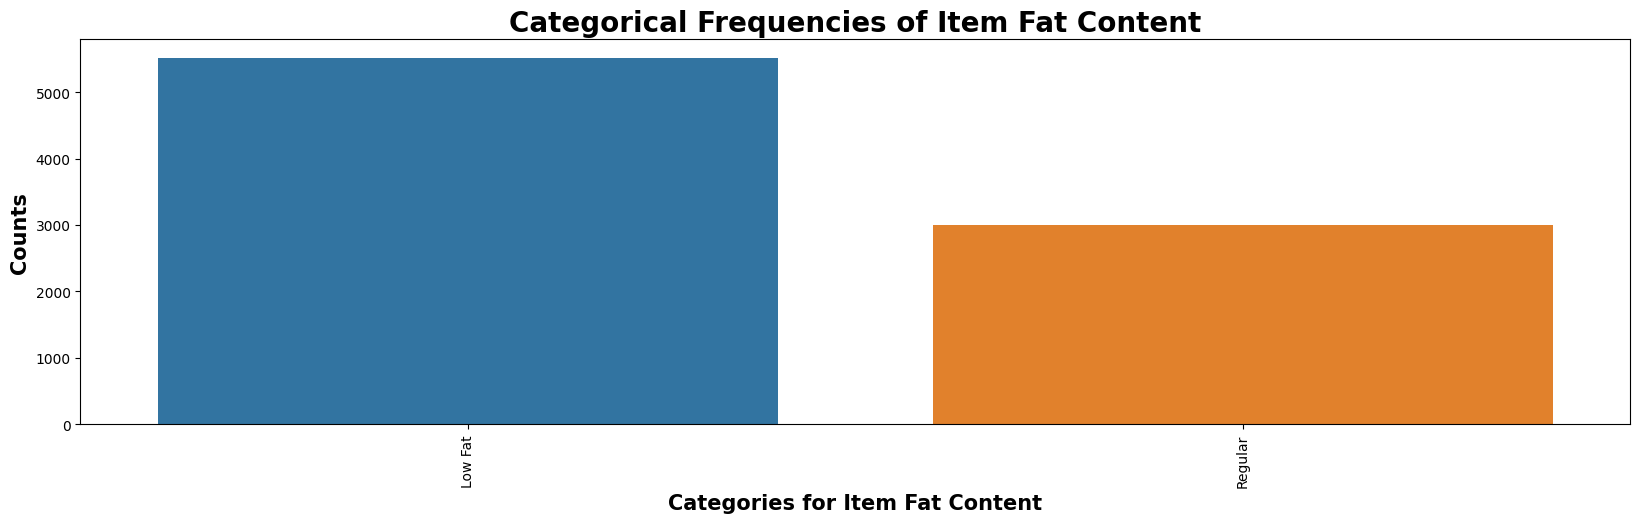

In [53]:
fig, ax = plot_bar(df, 'Item_Fat_Content', 'Item Fat Content');
print(df['Item_Fat_Content'].value_counts())

* We can determine that the count of Low Fat products is nearly twice the count of regular fat products.

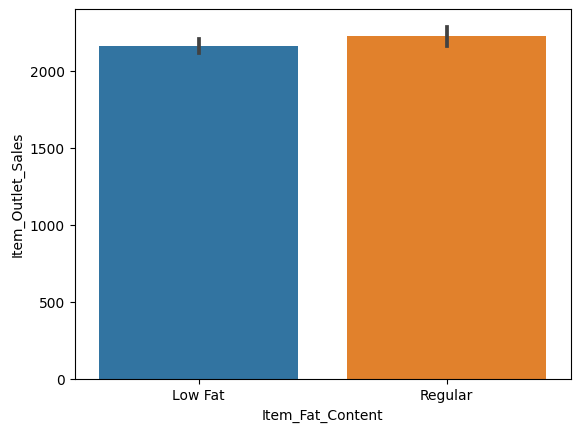

In [66]:
ax = sns.barplot(data=df, x='Item_Fat_Content', y="Item_Outlet_Sales")

However, if we take a further analysis we can see that the Sales of Regular Fat items, even though they are much lower in count, are greater than our low fat.

###Item_Type

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


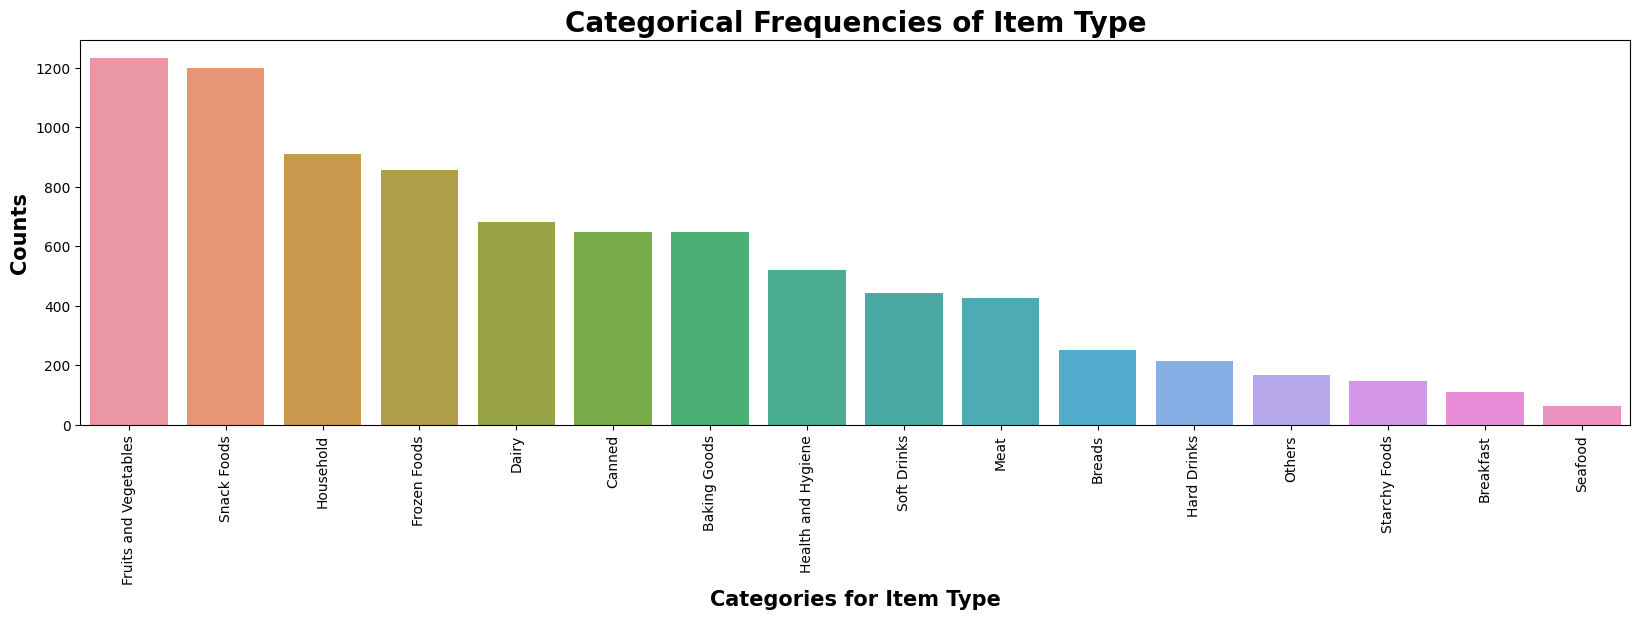

In [54]:
fig, ax = plot_bar(df, 'Item_Type', 'Item Type');
print(df['Item_Type'].value_counts())

* The graph shows us that our categories for food type are diverse but the highest count is in Fruits and Vegetables, Snack Foods and Household; while the lowest counts represent our Seafood, Breakfast and Starchy Foods.

###Outlet_Size

Medium     2793
MISSING    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64


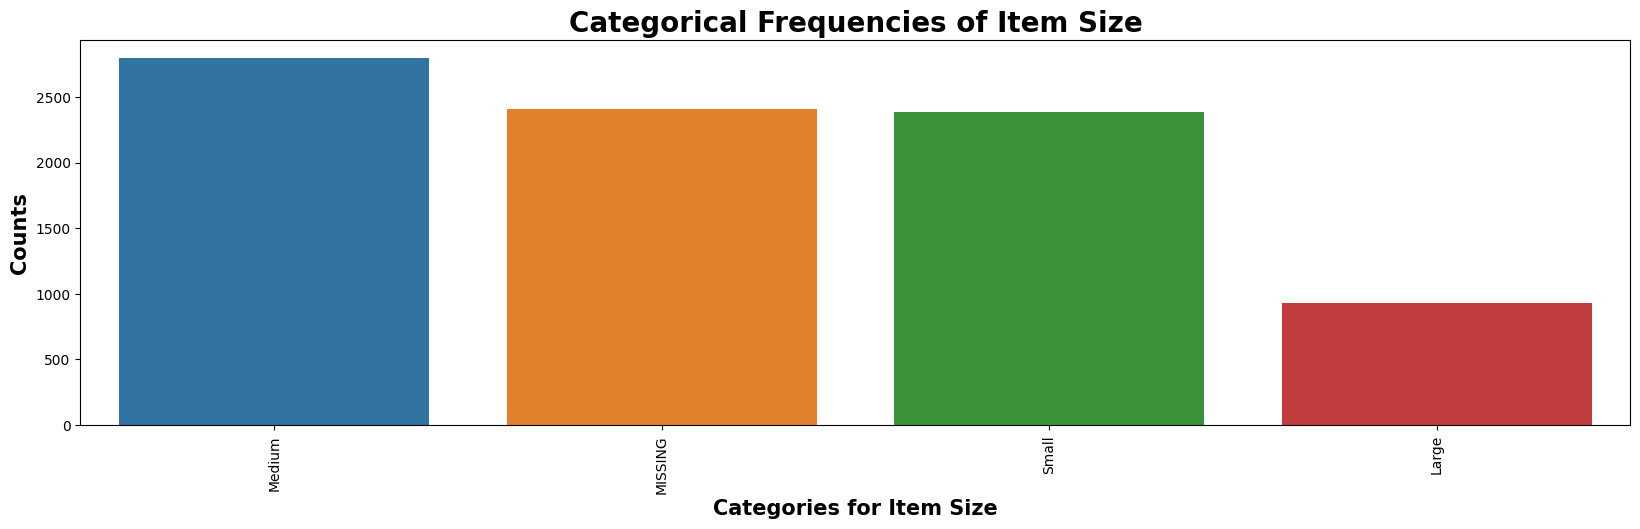

In [55]:
fig, ax = plot_bar(df, 'Outlet_Size', 'Item Size');
print(df['Outlet_Size'].value_counts())

* Our item size distribution shows us that our Large Item Sizes are the least frequent.
* However, we can also see that over 2400 units are in the MISSING Column. These could influence the data spread considerably if they are determined. (For example, if they were ALL Large it would turn the Large from the least frequent to by far the most frequent.

###Outlet_Location_Type

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


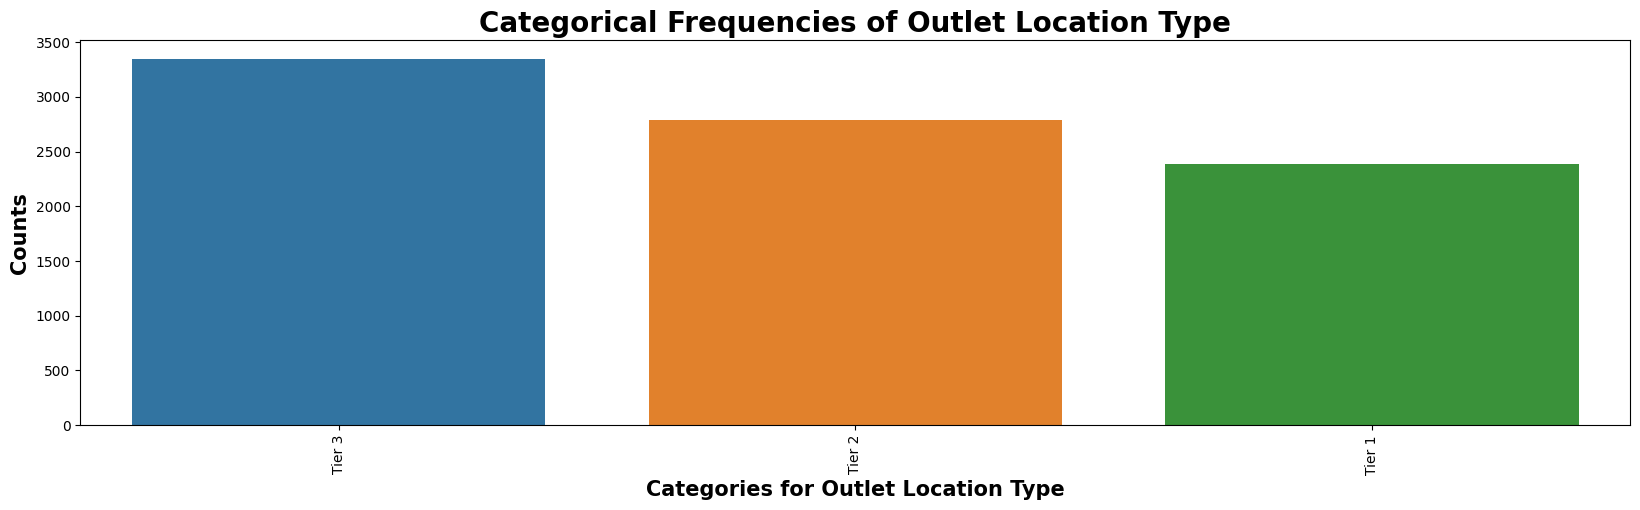

In [56]:
fig, ax = plot_bar(df, 'Outlet_Location_Type', 'Outlet Location Type');
print(df['Outlet_Location_Type'].value_counts())

* This data helps us understand that the Majority of our Outlet Locations are a Tier 3 location.

###Outlet_Type

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


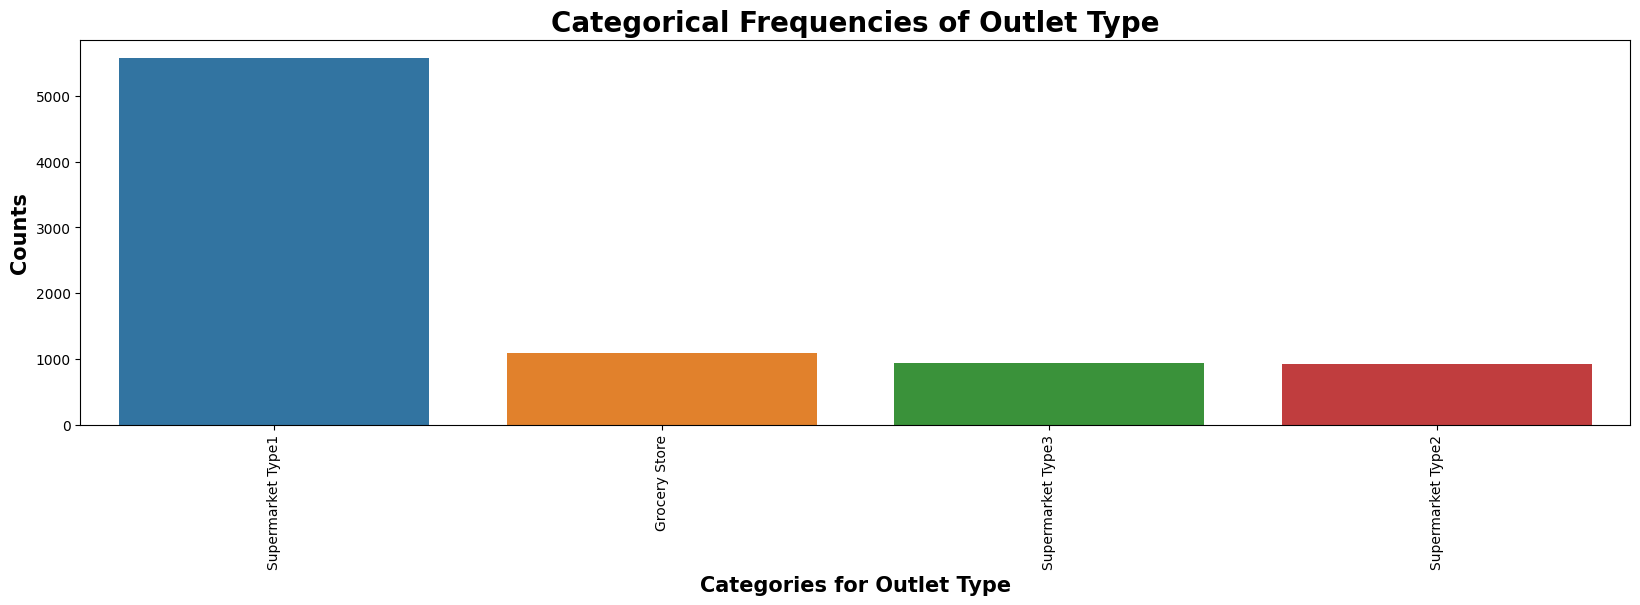

In [57]:
fig, ax = plot_bar(df, 'Outlet_Type', 'Outlet Type');
print(df['Outlet_Type'].value_counts())

* From this Graph, we can clearly see that the vast majority of our Outlets are the Supermaket Type 1.

##Correlation

Lets explore the correlations possible in our data set:

In [58]:
corr = df.corr(numeric_only = True).round(2)
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


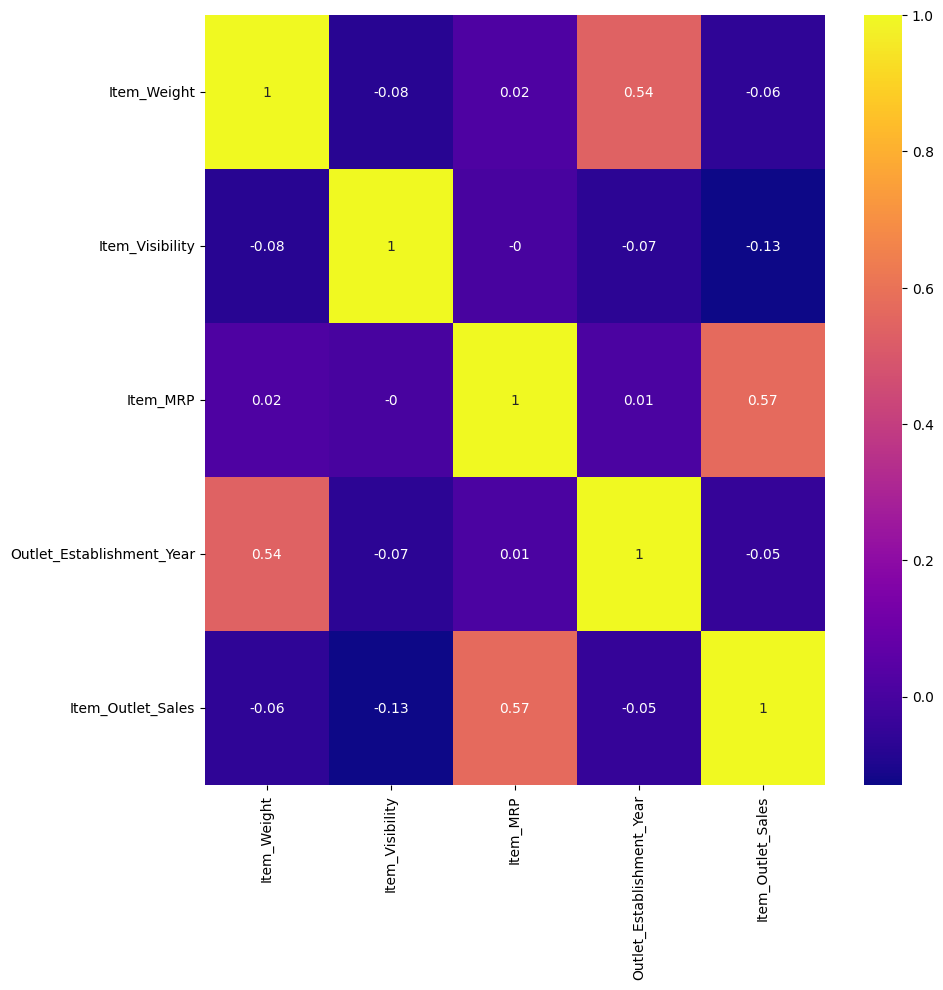

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap = "plasma",annot=True);

Based on the results expressed in our figures, we can determine correlations in several areas:
* Positive Correlation:Outlet_Establishment Year & Item_Weight
  * This is a moderate correlation that is interesting and can be explored further. How does the Establishment Year influence our Item weight?
* Positive Correlation: Item_Outlet_Sales & Item_MRP
  * This is a moderate correlation. This could be useful to explore further as Outlet Sales is an important metric.


#Explanatory Data Analysis: